<img src="images/capa_1.png" width="1550" height="850">

# **1. Introdução à Estatística**
***


## **Conceitos Fundamentais**

> **O que é Estatística?**

***Estatística*** é uma das grandes áreas da matemática que se dedica a análise da frequência, aleatoriedade e incerteza de eventos e fenômenos, identificação de padrões e tendências, bem como a previsão de fenômenos futuros. Para isso, ele se baseia na coleta, organização, análise e interpretação de dados coletados. 

Dizemos que a estatística trabalha para produzir a informação mais confiável possível a partir de uma **amostra** de dados, a fim de se tirar conclusões precisas sobre um todo, a **população**. Portanto, ela é intimamente ligada à **tomada de decisão**.

Estatística e análise de dados são, certa forma, sinônimos, pois ela é fundamental ao fornecer as ferramentas e os métodos necessários para se tirar conclusões sobre os dados com que se trabalha, suportando as tomadas de decisão do negócio.








> **População e Amostra**

Ao se fazer uma análise estatística, não é normal (e nem provável) que tenha-se todos os dados existentes sobre aquilo que se estuda. O que se tem é uma amostra, uma parcela que representa a população. A partir dessa amostra, aplicam-se as técnicas e métodos estatísticos para se tirar conclusões sobre a população. Logo, não apenas os métodos devem ser bem aplicados, mas o processo de amostragem deve ser cuidadoso para que se mantenha a variâcia presente na população e, portanto, evitar viéses.

<img src="images/populacao_amostra.png" width="600">

Vamos utilizar um conjunto de dados sobre ações brasileiras para os nossos estudos, disponível em no site [Status Invest.](https://statusinvest.com.br/acoes/busca-avancada)

In [1]:
import pandas as pd

In [3]:
# Todas as ações brasileiras - População
b3 = pd.read_excel('data/acoes.xlsx')

In [4]:
print(b3.shape[0])
b3.head()

604


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,12.20,NaN,-6.61,1.29,0.54,29.80,3.29,-18.37,36.93,...,0.42,0.58,0.44,1.84,NaN,3.544085e+05,9.47,-1.85,0.28,1.443172e+09
1,ABCB4,21.30,7.16,5.91,0.88,0.09,16.03,9.38,10.00,6.29,...,0.10,0.90,0.15,20.08,16.19,1.109779e+07,24.07,3.61,-0.20,5.211191e+09
2,ABEV3,12.88,5.67,14.10,2.13,1.41,50.83,23.88,17.85,10.54,...,0.66,0.33,0.56,9.68,5.54,4.141447e+08,6.05,0.91,17.06,2.029586e+11
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,6.20,NaN,-2.61,0.35,0.11,11.07,5.44,-6.52,3.13,...,0.30,0.70,0.62,34.34,NaN,1.973114e+06,17.62,-2.38,-0.02,3.851452e+08


Vamos levantar uma amostra desse conjunto de dados, que serão as ações que compõe o índice Ibovespa.

Esse índice é composto por uma carteira teórica das ações mais negociadas da bolsa brasileira. Nessa composição, há empresas de diversos setores, refletindo com boa precisão o comportamento do mercado de ações.

In [5]:
tickers_ibovespa = [
    "BRAV3", "AESB3", "AURE3", "ALPA4", "ABEV3", "AMER3", "ASAI3", "AZUL4", "B3SA3", "BBAS3",
    "BBDC3", "BBDC4", "BPAN4", "BRFS3", "BPAC11", "CSNA3", "CCRO3", "CMIG4", "CPLE6", "CSAN3",
    "CPFE3", "CYRE3", "ENGI11", "ELET3", "ELET6", "EMBR3", "PETR3", "PETR4", "ITSA4", "ITUB4",
    "MGLU3", "MRFG3", "BEEF3", "NTCO3", "PRIO3", "RAIZ4", "RDOR3", "RAIL3", "SANB11", "SULA11",
    "SUZB3", "VIVT3", "TIMS3", "TOTS3", "VALE3", "BHIA3", "VBBR3", "WEGE3"
]

empresas_ibovespa = [
    "Brava Energia", "AES Brasil", "Auren Energia", "Alpargatas", "Ambev", "Americanas", "Assaí",
    "Azul", "B3", "Banco do Brasil", "Bradesco", "Bradesco PN", "Banco Pan", "BRF", "BTG Pactual",
    "CSN", "CCR", "Cemig", "Copel", "Cosan", "CPFL Energia", "Cyrela", "Energisa", "Eletrobras",
    "Eletrobras PNB", "Embraer", "Petrobras", "Petrobras PN", "Itaúsa", "Itaú Unibanco",
    "Magazine Luiza", "Marfrig", "Minerva", "Natura", "PetroRio", "Raízen", "Rede D'Or", "Rumo",
    "Santander Brasil", "Sul América", "Suzano", "Telefônica Brasil", "Tim", "Totvs", "Vale",
    "Via", "Vibra Energia", "WEG"
]

setores_ibovespa = [
    "Petróleo, Gás e Biocombustíveis", "Energia Elétrica", "Energia Elétrica", "Consumo Cíclico", 
    "Bebidas e Alimentos", "Consumo Cíclico", "Consumo Não Cíclico", "Transporte", "Financeiro", 
    "Financeiro", "Financeiro", "Financeiro", "Financeiro", "Bebidas e Alimentos", "Financeiro", 
    "Siderurgia e Metalurgia", "Transporte", "Energia Elétrica", "Energia Elétrica", "Petróleo, Gás e Biocombustíveis", 
    "Energia Elétrica", "Construção Civil", "Energia Elétrica", "Energia Elétrica", "Energia Elétrica", 
    "Aeronáutica e Defesa", "Petróleo, Gás e Biocombustíveis", "Petróleo, Gás e Biocombustíveis", 
    "Financeiro", "Financeiro", "Consumo Cíclico", "Bebidas e Alimentos", "Bebidas e Alimentos", 
    "Consumo Não Cíclico", "Petróleo, Gás e Biocombustíveis", "Petróleo, Gás e Biocombustíveis", "Saúde", 
    "Transporte", "Financeiro", "Financeiro", "Papel e Celulose", "Telecomunicações", "Telecomunicações", 
    "Tecnologia", "Mineração", "Consumo Cíclico", "Petróleo, Gás e Biocombustíveis", "Bens de Capital"
]

In [6]:
dados_ibovespa = {
    "TICKER":tickers_ibovespa,
    "EMPRESA":empresas_ibovespa,
    "SETORES":setores_ibovespa
}

ibov = pd.DataFrame(data=dados_ibovespa)
ibov = ibov.merge(b3, how="left", on="TICKER")
ibov.head()

,TICKER,EMPRESA,SETORES,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,BRAV3,Brava Energia,"Petróleo, Gás e Biocombustíveis",16.95,2.27,-27.53,1.59,0.36,30.69,25.07,...,0.23,0.77,0.40,178.26,NaN,1.720014e+08,10.65,-0.62,0.17,7.867836e+09
1,AESB3,AES Brasil,Energia Elétrica,11.78,0.63,-53.37,1.67,0.35,31.51,25.36,...,0.21,0.74,0.18,NaN,NaN,6.558786e+07,7.06,-0.22,0.28,7.115705e+09
2,AURE3,Auren Energia,Energia Elétrica,10.40,18.27,-26.96,0.84,0.36,20.59,20.40,...,0.42,0.58,0.21,NaN,NaN,5.283222e+07,12.32,-0.39,0.24,1.040000e+10
3,ALPA4,Alpargatas,Consumo Cíclico,6.94,NaN,-3.03,1.22,0.72,42.42,-41.40,...,0.59,0.41,0.59,-0.89,NaN,2.022729e+07,5.71,-2.29,-0.01,4.658969e+09
4,ABEV3,Ambev,Bebidas e Alimentos,12.88,5.67,14.10,2.13,1.41,50.83,23.88,...,0.66,0.33,0.56,9.68,5.54,4.141447e+08,6.05,0.91,17.06,2.029586e+11


In [7]:
ibov.shape

(48, 32)

In [8]:
# Salva o dataframe para ser utilizado em outras aulas
ibov.to_csv("data/ibov.csv", index=False)

> **Variáveis**

Variáveis são as características da população, ou da amostra. Elas podem ser contadas, medidas, calculadas ou categorizadas, conforme o seu tipo.

- As *não-métricas* são representadas por meio de tabelas de frequência ou gráficos. Elas representam características do indivíduo ou do fenômeno. Com exceção à moda (medida de posição) não se aplica outras medidas estatísticas a esse tipo de variável.

- Variáveis *métricas* podem ser representadas por gráficos, medidas de posição, de dispersão e de forma. Elas podem ser discretas (valores inteiros) ou contínuas (valores não-inteiros).


<img src="images/variaveis.png" width="600">

In [8]:
# Variável qualitativa
ibov['SETORES'].value_counts()

SETORES
Financeiro                         10
Energia Elétrica                    8
Petróleo, Gás e Biocombustíveis     7
Consumo Cíclico                     4
Bebidas e Alimentos                 4
Transporte                          3
Consumo Não Cíclico                 2
Telecomunicações                    2
Siderurgia e Metalurgia             1
Construção Civil                    1
Aeronáutica e Defesa                1
Saúde                               1
Papel e Celulose                    1
Tecnologia                          1
Mineração                           1
Bens de Capital                     1
Name: count, dtype: int64

<Axes: ylabel='SETORES'>

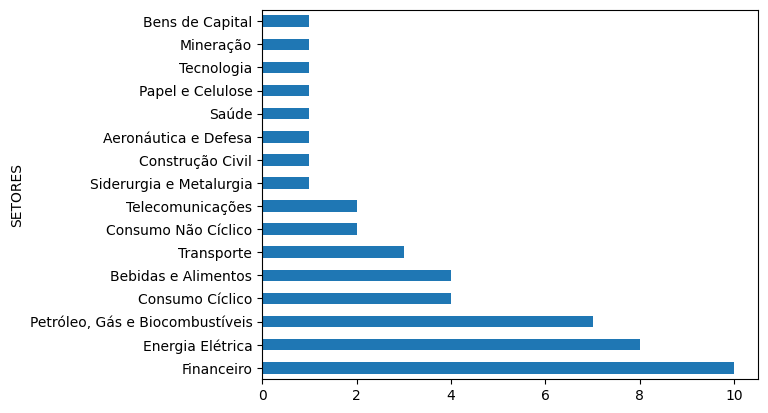

In [9]:
# Variável qualitativa
ibov['SETORES'].value_counts().plot(kind="barh")

In [10]:
# Variáveis quantitativas
ibov[['PRECO', 'DY', 'P/L']].describe()

,PRECO,DY,P/L
count,48.000000,37.000000,48.000000
mean,22.982083,6.015676,21.220625
std,15.882289,4.874364,68.074203
min,2.910000,0.170000,-53.370000
25%,10.640000,2.270000,5.332500
50%,17.295000,4.590000,9.770000
75%,33.677500,8.450000,18.702500
max,60.700000,18.270000,345.870000


## **Tipos de Variáveis e Escalas de Mensuração**

Além da classificação pelo tipo, as variáveis ainda podem ser subdivididas conforme a sua escala de mensuração.

> **Variáveis Qualitativas**
- Escala Nominal: Quando dados categóricos estão distribuídos de forma a não seguirem uma hierarquia, como no nosso exemplo do setor das empresas.

- Escala Ordinal: Aqui, há uma ordem definida entre as categorias da variável, mas as distâncias entre os valore não são obrigatoriamente uniformes. Classificações de atendimento ("Péssimo", "Bom", "Ótimo") são um exemplo presente no cotidiano.

<br>

> **Variáveis Quantitativas**
- Escala Intervalar: Nesta escala, há uma distância consistente entre os valores. Na escala intervalar, não há um zero verdadeiro, uma vez que ele não deve representar a ausência da característica. Um exemplo é na medida de temperatura (em graus Celsius), em que o valor zero não representa a ausência do fenômeno, mas divide valores negativos de positivos. Algumas estatísticas descritivas não podem ser aplicadas nesse tipo de variálvel, como o coeficiente de variação.

- Escala de Razão: Nesta, ao contrário da escala intervalar, o valor zero representa a ausência do que se mede, como em casos de renda, altura. Nosso exemplo, um dividend yield com valor zero significa que não foi distribuído pela empresa. Esse tipo de variável permite a aplicação de todas as estatísticas descritivas.

<img src="images/escalas.png" width="600">

Ainda existem as variáveis binárias ou *dummy*. Estas variáveis assumem apenas 2 valores, 0 ou 1, que representam a ausência ou a presença do fenômeno de característica, respectivamente.

Veremos que variáveis dummy podem ser criadas a partir de variáveis categóricas, de acordo com a necessidade, como nos casos de análises de regressão. Um erro que se comete é arbitrariamente ponderar valores numéricos às categorias de uma variável qualitativa, ao fazer uma regressão. A abordagem correta seria fazer um processo de *"dummização"* desta variável categórica (n-1 *dummies*). Veremos este assunto mais a frente, mas vale a pena mencioná-lo.

## **Estatística Descritiva e Inferencial**

Quando falamos sobre as abordagens de técnicas e métodos, podemos dividi-los entre estatístical descritiva e inferencial.

A estatística descritiva, conforme seu nome, fornece os meios para organizar, descrever e sintetizar os dados por meio de gráficos, tabelas e medidas de posição, dispersão ou forma. Portanto, ela nos ajuda a conhecer melhor os dados que temos para análise (amostra), mas somente com ela não é adequado tirar conclusões sobre a população.


Para tomar conclusões sobre a população, fazendo análises e testando hipóteses com os dados amostrais, temos a estatística inferencial. O seu objetivo é validar se os padrões observados no conjunto amostral aplicam-se à população, considerando um determinado nível de confiança.

#

***
**Referências:**

- Fávero, L. P.; Belfiore, P. 2017. Manual de Análise de Dados: Estatística e Modelagem Multivariada com Excel, SPSS e Stata. 1ed. Editora LTC, Rio de Janeiro, RJ, Brasil.